# Exploratory Data Analysis

In [1]:
import os
import sqlite3

import pandas as pd

VISUAL_CROSSING_API_KEY = os.getenv("VISUAL_CROSSING_API_KEY") 
import bikerides.utils
import bikerides.visualcrossing

import numpy as np

import pandas as pd
from pandas import to_datetime
import seaborn as sns
import matplotlib.pyplot as plt
import requests 


import seaborn as sns

PROJECT_ROOT = bikerides.utils.get_project_root()
print(PROJECT_ROOT)

DB_FNAME = 'db.sqlite3'
DB_FPATH = os.path.join(PROJECT_ROOT, 'data', 'processed', DB_FNAME)
conn = sqlite3.connect(DB_FPATH, detect_types=sqlite3.PARSE_DECLTYPES)

%load_ext sql
%sql sqlite:///{DB_FPATH}


/home/audeering.local/cgeng/work/myfiles/bikerides


In [2]:
!sqlite3 ../data/processed/db.sqlite3 ".read ../assets/sql_views.sql"

# Basic Views and Tables

In [3]:
query = """select * from weather_hourly;"""
df = pd.read_sql_query(query, conn)
display(df)
print(df.shape)

datetime       datetimeEpoch  temp  feelslike  humidity  precip  \
0     00:00:00 2013-07-01 04:00:00  23.2       23.2     87.82     0.0   
1     01:00:00 2013-07-01 05:00:00  23.7       23.7     85.27     0.0   
2     02:00:00 2013-07-01 06:00:00  23.7       23.7     85.27     0.0   
3     03:00:00 2013-07-01 07:00:00  23.2       23.2     87.82     0.0   
4     04:00:00 2013-07-01 08:00:00  23.1       23.1     88.32     0.0   
...        ...                 ...   ...        ...       ...     ...   
6330  19:00:00 2014-03-21 23:00:00   9.7        7.7     26.51     0.0   
6331  20:00:00 2014-03-22 00:00:00   8.8        7.3     29.14     0.0   
6332  21:00:00 2014-03-22 01:00:00   8.0        8.0     32.02     0.0   
6333  22:00:00 2014-03-22 02:00:00   6.8        6.8     34.18     0.0   
6334  23:00:00 2014-03-22 03:00:00   6.5        4.6     35.81     0.0   

      precipprob  windgust  windspeed  cloudcover        tzoffset  \
0            0.0       NaN        5.8        35.2 -14400000000000   
1            0.0       NaN        3.4       100.0 -14400000000000   
2            0.0       NaN        4.1        99.2 -14400000000000   
3            0.0       NaN        7.3       100.0 -14400000000000   
4            0.0       NaN        4.1       100.0 -14400000000000   
...          ...       ...        ...         ...             ...   
6330         0.0      27.7       14.5        10.5 -18000000000000   
6331         0.0       NaN        9.1         4.4 -18000000000000   
6332         0.0       NaN        4.3         4.4 -18000000000000   
6333         0.0       NaN        4.4         4.4 -18000000000000   
6334         0.0       NaN        9.2         4.4 -18000000000000   

                 date_hh  
0    2013-07-01 00:00:00  
1    2013-07-01 01:00:00  
2    2013-07-01 02:00:00  
3    2013-07-01 03:00:00  
4    2013-07-01 04:00:00  
...                  ...  
6330 2014-03-21 18:00:00  
6331 2014-03-21 19:00:00  
6332 2014-03-21 20:00:00  
6333 2014-03-21 21:00:00  
6334 2014-03-21 22:00:00  

[6335 rows x 12 columns]

(6335, 12)


In [4]:
query = """select * from vw_bicyclerides limit 100;"""
df = pd.read_sql_query(query, conn)

col_list = ['date_hh', 'starttime', 'usertype']
df[col_list]


date_hh           starttime    usertype
0   2013-07-01 00:00:00 2013-07-01 00:00:00    Customer
1   2013-07-01 00:00:00 2013-07-01 00:00:02    Customer
2   2013-07-01 00:00:00 2013-07-01 00:01:04  Subscriber
3   2013-07-01 00:00:00 2013-07-01 00:01:06    Customer
4   2013-07-01 00:00:00 2013-07-01 00:01:10  Subscriber
..                  ...                 ...         ...
95  2013-07-01 00:00:00 2013-07-01 00:21:42    Customer
96  2013-07-01 01:00:00 2013-07-01 00:21:56    Customer
97  2013-07-01 01:00:00 2013-07-01 00:24:04  Subscriber
98  2013-07-01 01:00:00 2013-07-01 00:24:26    Customer
99  2013-07-01 01:00:00 2013-07-01 00:25:16  Subscriber

[100 rows x 3 columns]

## Number of Bike Stations


Does the number of station names stay constant over the time period?

In [5]:
query = """select strftime('%Y-%m', date_hh) as month,
 count(distinct("start station name")) as N
from vw_bicyclerides
GROUP BY strftime('%Y-%m', date_hh)
ORDER BY month;"""
df = pd.read_sql(query, conn)
df

month    N
0  2013-07  329
1  2013-08  330
2  2013-09  330
3  2013-10  330
4  2013-11  330
5  2013-12  329
6  2014-01  329
7  2014-02  329
8  2014-03   58

In [6]:
query = """select * from stations;"""
pd.read_sql(query, conn).set_index('name').sort_values('N Rentals', ascending=False)

N Rentals        lat        lon
name                                                          
Pershing Square N                  56693  40.751884 -73.977702
E 17 St & Broadway                 55007  40.737050 -73.990093
8 Ave & W 31 St                    53870  40.750450 -73.994811
Lafayette St & E 8 St              52830  40.730287 -73.990765
W 20 St & 11 Ave                   47423  40.746745 -74.007756
...                                  ...        ...        ...
Hanover Pl & Livingston St          1525  40.688646 -73.982634
Park Ave & St Edwards St            1265  40.696089 -73.978034
7 Ave & Farragut St                 1147  40.698921 -73.973330
Cadman Plaza E & Red Cross Pl        840  40.699918 -73.989718
Railroad Ave & Kay Ave               562  40.705312 -73.971001

[330 rows x 3 columns]

## How many hours of weather are there in the database?

In [7]:

query = """select count(*) from weather_hourly;"""
pd.read_sql(query, conn)

count(*)
0      6335

## Does the weather change per weekday?


As in the task definition pdf. Cannot answer as "customers per weekday" there are is no customer ids. Therefore counting the number of rentals instead.


In [8]:
query = """SELECT case cast (strftime('%w', bikes.date_day) as integer)
           when 0 then 'Sunday'
           when 1 then 'Monday'
           when 2 then 'Tuesday'
           when 3 then 'Wednesday'
           when 4 then 'Thursday'
           when 5 then 'Friday'
           else 'Saturday'
       end as 'WeekDay',
       avg(weather.humidity) as 'hum[mean]',
       count(*) as 'N Rentals'
FROM vw_bicyclerides as bikes
INNER JOIN weather_hourly as weather on weather.date_hh = bikes.date_hh
where bikes."start station name" = 'E 25 St & 2 Ave'
group by WeekDay
ORDER BY strftime('%w', bikes.date_day);
"""
pd.read_sql(query, conn).set_index('WeekDay')

hum[mean]  N Rentals
WeekDay                        
Sunday     54.820624       3059
Monday     56.408804       3736
Tuesday    56.856223       4016
Wednesday  58.717612       3856
Thursday   62.403664       3895
Friday     56.240317       3885
Saturday   56.086780       3227

## Ridership Patterns

Absorbed from [here](https://towardsdatascience.com/use-weather-history-with-nyc-bike-share-trip-data-51fcb89297d).

In [9]:
query = """SELECT bikes.date_hh, starttime, weather.humidity, bikes.date_day, strftime('%w',bikes.date_day) as wd
FROM vw_bicyclerides as bikes
INNER JOIN weather_hourly as weather on weather.date_hh = bikes.date_hh
where bikes."start station name" = 'E 25 St & 2 Ave';"""
df = pd.read_sql(query, conn)
df.groupby(['wd']).agg({"humidity": "mean", "date_day": 'size'}).reset_index().set_index('wd')

humidity  date_day
wd                     
0   54.820624      3059
1   56.408804      3736
2   56.856223      4016
3   58.717612      3856
4   62.403664      3895
5   56.240317      3885
6   56.086780      3227

In [10]:
df['date_day'] = pd.to_datetime(df['date_day'])
df['starttime'] = pd.to_datetime(df['starttime'])
df['start hour'] = df['starttime'].dt.hour.astype('category')
df['start day'] = df['starttime'].dt.day.astype('category')
df['weekday'] = df['starttime'].dt.weekday.astype('category')
df['weekend'] = [ d >=5 for d in df['weekday']]
df['month'] = df['starttime'].dt.month_name().astype('category')
df['mth'] = df['starttime'].dt.month.astype('category')
df['year'] = df['starttime'].dt.year.astype('category')
df

date_hh           starttime  humidity   date_day wd  \
0      2013-07-01 00:00:00 2013-07-01 00:12:31     87.82 2013-07-01  1   
1      2013-07-01 01:00:00 2013-07-01 00:42:36     85.27 2013-07-01  1   
2      2013-07-01 03:00:00 2013-07-01 02:18:48     87.82 2013-07-01  1   
3      2013-07-01 03:00:00 2013-07-01 02:48:24     87.82 2013-07-01  1   
4      2013-07-01 05:00:00 2013-07-01 05:25:53     87.82 2013-07-01  1   
...                    ...                 ...       ...        ... ..   
25669  2014-02-28 20:00:00 2014-02-28 20:19:06     30.05 2014-02-28  5   
25670  2014-02-28 21:00:00 2014-02-28 20:37:42     34.45 2014-02-28  5   
25671  2014-02-28 21:00:00 2014-02-28 20:41:54     34.45 2014-02-28  5   
25672  2014-02-28 23:00:00 2014-02-28 22:38:13     35.47 2014-02-28  5   
25673  2014-02-28 23:00:00 2014-02-28 23:05:55     35.47 2014-02-28  5   

      start hour start day weekday  weekend     month mth  year  
0              0         1       0    False      July   7  2013  
1              0         1       0    False      July   7  2013  
2              2         1       0    False      July   7  2013  
3              2         1       0    False      July   7  2013  
4              5         1       0    False      July   7  2013  
...          ...       ...     ...      ...       ...  ..   ...  
25669         20        28       4    False  February   2  2014  
25670         20        28       4    False  February   2  2014  
25671         20        28       4    False  February   2  2014  
25672         22        28       4    False  February   2  2014  
25673         23        28       4    False  February   2  2014  

[25674 rows x 12 columns]

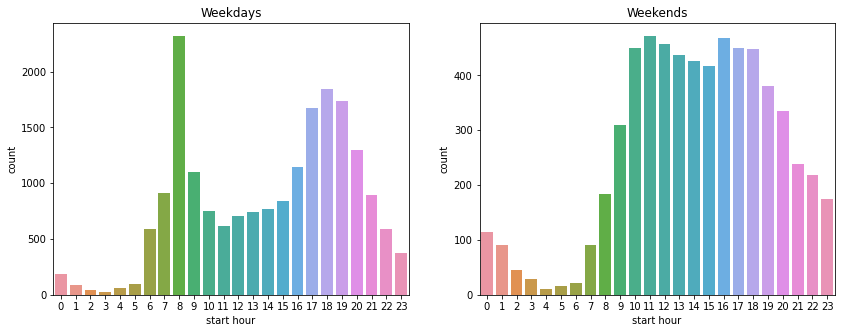

In [11]:
fig, ax = plt.subplots(1,2, figsize=(14,5))
sns.countplot(data=df[~df['weekend']],x="start hour",\
  ax=ax[0]).set_title("Weekdays")
sns.countplot(data=df[df['weekend']],x="start hour",\
  ax=ax[1]).set_title("Weekends") ;

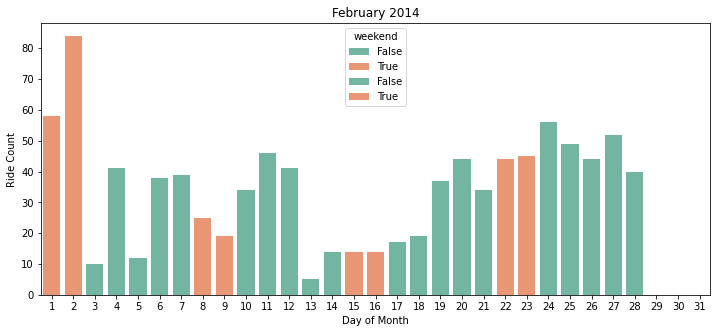

In [12]:
def plt_daily_rides_per_month(df: pd.DataFrame, month='July', year=2013):
    plt.figure(figsize=(12,5)) 
    
    df = df.loc[(df['month'] == month) & (df['year'] == year)]
    
    sns.set_palette("Set2")
    sns.countplot(data=df,x="start day", hue='weekend', dodge=False) 
    ax=sns.countplot(data=df,x="start day", hue='weekend', dodge=False ) 
    ax.set(xlabel="Day of Month", ylabel="Ride Count",\
      title=f'{month} {year}')
    
plt_daily_rides_per_month(df, month='February', year=2014)

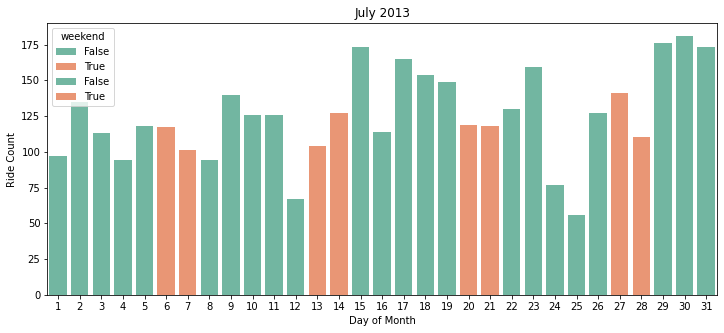

In [13]:
plt_daily_rides_per_month(df, month='July', year=2013)

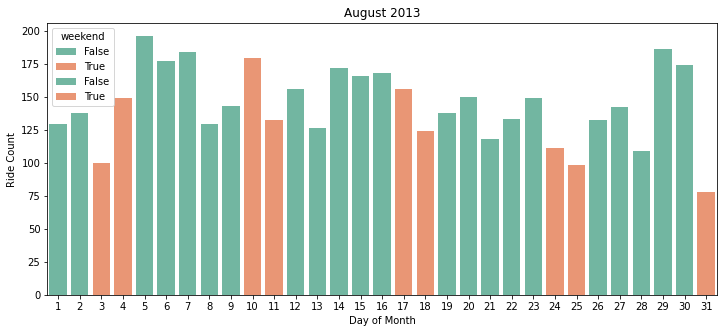

In [14]:
plt_daily_rides_per_month(df, month='August', year=2013)

# Average Rentals per Day and Temperature, Correlations

In [15]:
query = """SELECT strftime('%Y %m %d', bikes.date_hh) as date,
       round(avg(weather.temp), 1) as 'temp[mean]',
       bikes.date_hh,
       count(*) as 'N Rentals'
FROM vw_bicyclerides as bikes
INNER JOIN weather_hourly as weather on weather.date_hh = bikes.date_hh
group by date
ORDER BY date;
"""

df = pd.read_sql(query, conn).set_index('date')
df

temp[mean]              date_hh  N Rentals
date                                                  
2013 07 01        23.6  2013-07-01 00:00:00      16412
2013 07 02        25.6  2013-07-02 02:00:00      22734
2013 07 03        25.8  2013-07-03 02:00:00      21795
2013 07 04        29.1  2013-07-04 01:00:00      22148
2013 07 05        30.1  2013-07-05 08:00:00      21918
...                ...                  ...        ...
2014 02 25        -1.7  2014-02-25 01:00:00      12812
2014 02 26        -3.1  2014-02-26 01:00:00      11193
2014 02 27        -3.0  2014-02-27 02:00:00      12077
2014 02 28        -7.4  2014-02-28 07:00:00       9562
2014 03 01        -6.1  2014-03-01 01:00:00         72

[244 rows x 3 columns]

/home/audeering.local/cgeng/.envs/bikerides/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='temp[mean]', ylabel='N Rentals'>

<Figure size 864x360 with 0 Axes>

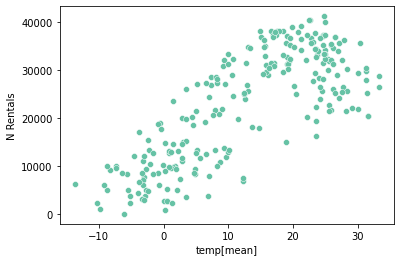

In [19]:
#def scatter_tmp(x, y):
#    fig, ax = plt.subplots()
#    sns.scatterplot(
#        x=x,
#        y=y,
#        style=style,
#        style_order=style_order,
#        size=size,
#        size_order=size_order,
#        hue=hue,
#        hue_order=hue_order,
#        palette=palette,
#        legend=False,
#        ax=ax,
#    )


# %matplotlib inline
plt.figure(figsize=(12,5)) 
fig, ax = plt.subplots()
#sns.scatterplot(x,y)

sns.scatterplot(df['temp[mean]'], df['N Rentals'])

# Marker style encodes sex
# style = sex.loc[index]
# style_order = ['female', 'male']
# Marker style encodes sex
# style = sex.loc[index]
# style_order = ['female', 'male']



## N rentals per hour

Plot is dumb as every day has very low and very high values


In [ ]:
query = """select date_hh, count (*) from vw_bicyclerides GROUP BY date_hh;"""
df = pd.read_sql(query, conn)
df.set_index('date_hh', inplace=True)

In [ ]:
%matplotlib inline
sns.scatterplot(x=df.index, y='count (*)', data=df)